<a href="https://colab.research.google.com/github/asddasdv/DBGROUP40/blob/main/StudentVLE4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. Connecting to the Drive**
### Connecting to drive and the Database. The database called StudentVLE will store all the table information that we will be using in this project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sqlite3

# INSTRUCTIONS FELLOW LADS!!!!! IF YOU ARE VISITING THIS PAGE AND WONDERING WHY YOU CANNOT RUN THIS CODE,
# YOU NEED TO MAKE A SHORTCUT OF OUR SHARED 'Database' FOLDER IN THE SHARED WITH ME INTO YOUR MAIN ROOT FOLDER
# 'My Drive' IN ORDER FOR THIS LINE OF CODE TO WORK!
conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE')

cur = conn.cursor()

# **Importing Files (DO NOT RUN UNLESS NECESSARY)**
### Importing our datasets into the environment. We will be storing these datas into google drive.

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload your CSV file

# **Table Creation and Manipulation (DO NOT RUN UNLESS NECESSARY)**
### Creation of Tables. Defining Attributes and Entities.

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!DO NOT TOUCH!!!!!! DO NOT TOUCH !!!!!!!!!!DO NOT TOUCH!!!!!!!!!!!
# !!!!!!!ONLY RUN IF NECESSARY!!!!! ONLY RUN IF NECESSARY!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Drop tables in reverse order of dependencies to avoid foreign key constraint issues
'''
cur.execute('DROP TABLE IF EXISTS studentVle')
cur.execute('DROP TABLE IF EXISTS studentAssessment')
cur.execute('DROP TABLE IF EXISTS studentRegistration')
cur.execute('DROP TABLE IF EXISTS studentInfo')
cur.execute('DROP TABLE IF EXISTS assessments')
cur.execute('DROP TABLE IF EXISTS vle')
cur.execute('DROP TABLE IF EXISTS courses')

# Commit changes and close the connection
conn.commit()

print("Tables dropped successfully!")
'''

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!DO NOT TOUCH!!!!!! DO NOT TOUCH !!!!!!!!!!DO NOT TOUCH!!!!!!!!!!!
# !!!!!!!ONLY RUN IF NECESSARY!!!!! ONLY RUN IF NECESSARY!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Drop tables in reverse order of dependencies to avoid foreign key constraint issues
'''
cur.execute('DROP TABLE IF EXISTS studentVleBU')
cur.execute('DROP TABLE IF EXISTS studentAssessmentBU')
cur.execute('DROP TABLE IF EXISTS studentRegistrationBU')
cur.execute('DROP TABLE IF EXISTS studentInfoBU')
cur.execute('DROP TABLE IF EXISTS assessmentsBU')
cur.execute('DROP TABLE IF EXISTS vleBU')
cur.execute('DROP TABLE IF EXISTS coursesBU')

# Commit changes and close the connection
conn.commit()

print("Back Up Tables dropped successfully!")
'''

In [ ]:
# ONLY FOR RESET
# List of live tables (the ones you are using for testing)
live_tables = ['studentVLE', 'studentAssessment', 'studentRegistration', 'studentInfo', 'assessments', 'vle', 'courses']

# List of backup tables (the ones used for resetting)
backup_tables = ['studentVleBU', 'studentAssessmentBU', 'studentRegistrationBU', 'studentInfoBU', 'assessmentsBU', 'vleBU', 'coursesBU']

# Step 1: Duplicate each live table using its backup
for i in range(len(live_tables)):
    live_table = live_tables[i]
    backup_table = backup_tables[i]

    # Step 2: Create a duplicate of the backup table with a new name
    cur.execute(f"CREATE TABLE {live_table}_duplicate AS SELECT * FROM {backup_table};")
    print(f"Duplicate of '{backup_table}' created as '{live_table}_duplicate'.")

    # Step 3: Drop the live table if it exists
    cur.execute(f"DROP TABLE IF EXISTS {live_table}")
    print(f"Live table '{live_table}' dropped.")

    # Step 4: Rename the duplicate to the original live table name
    cur.execute(f"ALTER TABLE {live_table}_duplicate RENAME TO {live_table};")
    print(f"Duplicate renamed to '{live_table}'.")

# Commit changes
conn.commit()

print("All tables have been duplicated and renamed successfully.")


In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!DO NOT TOUCH!!!!!! DO NOT TOUCH !!!!!!!!!!DO NOT TOUCH!!!!!!!!!!!
# !!!!!!!ONLY RUN IF NECESSARY!!!!! ONLY RUN IF NECESSARY!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Enable foreign key constraints
cur.execute("PRAGMA foreign_keys = ON")

# Create courses table
cur.execute('''
    CREATE TABLE courses (
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        module_presentation_length INT,
        PRIMARY KEY (code_module, code_presentation)
    )
''')

# Create studentInfo table
cur.execute('''
    CREATE TABLE studentInfo (
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        id_student INT PRIMARY KEY,
        gender VARCHAR(3),
        imd_band VARCHAR(16),
        highest_education VARCHAR(45),
        age_band VARCHAR(16),
        num_of_prev_attempts INT,
        studied_credits INT,
        region VARCHAR(45),
        disability VARCHAR(3),
        final_result VARCHAR(45),
        FOREIGN KEY (code_module, code_presentation) REFERENCES courses(code_module, code_presentation)
    )
''')

# Create studentRegistration table
cur.execute('''
    CREATE TABLE studentRegistration (
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        id_student INT,
        date_registration INT,
        date_unregistration INT,
        FOREIGN KEY (id_student) REFERENCES studentInfo(id_student),
        FOREIGN KEY (code_module, code_presentation) REFERENCES courses(code_module, code_presentation)
    )
''')


# Create assessments table
cur.execute('''
    CREATE TABLE assessments(
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        id_assessment INT PRIMARY KEY,
        assessment_type VARCHAR(45),
        date INT,
        weight INT,
        FOREIGN KEY (code_module, code_presentation) REFERENCES courses(code_module, code_presentation)
    )
''')

# Create studentAssessment table
cur.execute('''
    CREATE TABLE studentAssessment (
        id_student INT,
        id_assessment INT,
        date_submitted INT,
        is_banked TINYINT,
        score FLOAT,
        FOREIGN KEY (id_student) REFERENCES studentInfo(id_student),
        FOREIGN KEY (id_assessment) REFERENCES assessments(id_assessment)
    )
''')

# Create studentVle table
cur.execute('''
    CREATE TABLE studentVle (
        id_site INT,
        id_student INT,
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        date INT,
        sum_click INT,
        FOREIGN KEY (id_site) REFERENCES vle(id_site),
        FOREIGN KEY (id_student) REFERENCES studentInfo(id_student),
        FOREIGN KEY (code_module, code_presentation) REFERENCES courses(code_module, code_presentation)
    )
''')

# Create vle table
cur.execute('''
    CREATE TABLE vle (
        id_site INT PRIMARY KEY,
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        activity_type VARCHAR(45),
        week_from INT,
        week_to INT,
        FOREIGN KEY (code_module, code_presentation) REFERENCES courses(code_module, code_presentation)
    )
''')

# Commit changes and close the connection
conn.commit()

print("Tables created successfully!")

Tables created successfully!


In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!DO NOT TOUCH!!!!!! DO NOT TOUCH !!!!!!!!!!DO NOT TOUCH!!!!!!!!!!!
# !!!!!!!ONLY RUN IF NECESSARY!!!!! ONLY RUN IF NECESSARY!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Enable foreign key constraints
cur.execute("PRAGMA foreign_keys = ON")

# Create courses table
cur.execute('''
    CREATE TABLE coursesBU (
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        module_presentation_length INT,
        PRIMARY KEY (code_module, code_presentation)
    )
''')

# Create studentInfo table
cur.execute('''
    CREATE TABLE studentInfoBU (
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        id_student INT PRIMARY KEY,
        gender VARCHAR(3),
        imd_band VARCHAR(16),
        highest_education VARCHAR(45),
        age_band VARCHAR(16),
        num_of_prev_attempts INT,
        studied_credits INT,
        region VARCHAR(45),
        disability VARCHAR(3),
        final_result VARCHAR(45),
        FOREIGN KEY (code_module, code_presentation) REFERENCES coursesBU(code_module, code_presentation)
    )
''')

# Create studentRegistration table
cur.execute('''
    CREATE TABLE studentRegistrationBU (
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        id_student INT,
        date_registration INT,
        date_unregistration INT,
        FOREIGN KEY (id_student) REFERENCES studentInfoBU(id_student),
        FOREIGN KEY (code_module, code_presentation) REFERENCES coursesBU(code_module, code_presentation)
    )
''')


# Create assessments table
cur.execute('''
    CREATE TABLE assessmentsBU (
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        id_assessment INT PRIMARY KEY,
        assessment_type VARCHAR(45),
        date INT,
        weight INT,
        FOREIGN KEY (code_module, code_presentation) REFERENCES coursesBU(code_module, code_presentation)
    )
''')

# Create studentAssessment table
cur.execute('''
    CREATE TABLE studentAssessmentBU (
        id_student INT,
        id_assessment INT,
        date_submitted INT,
        is_banked TINYINT,
        score FLOAT,
        FOREIGN KEY (id_student) REFERENCES studentInfoBU(id_student),
        FOREIGN KEY (id_assessment) REFERENCES assessmentsBU(id_assessment)
    )
''')

# Create studentVle table
cur.execute('''
    CREATE TABLE studentVleBU (
        id_site INT,
        id_student INT,
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        date INT,
        sum_click INT,
        FOREIGN KEY (id_site) REFERENCES vleBU(id_site),
        FOREIGN KEY (id_student) REFERENCES studentInfoBU(id_student),
        FOREIGN KEY (code_module, code_presentation) REFERENCES coursesBU(code_module, code_presentation)
    )
''')

# Create vle table
cur.execute('''
    CREATE TABLE vleBU (
        id_site INT PRIMARY KEY,
        code_module VARCHAR(45),
        code_presentation VARCHAR(45),
        activity_type VARCHAR(45),
        week_from INT,
        week_to INT,
        FOREIGN KEY (code_module, code_presentation) REFERENCES coursesBU(code_module, code_presentation)
    )
''')

# Commit changes and close the connection
conn.commit()

print(" Back Up Tables created successfully!")

 Back Up Tables created successfully!


# **Loading loaded data into tables (DO NOT RUN UNLESS NECESSARY)**
### Loading our dataset into our created tables.

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!DO NOT TOUCH!!!!!! DO NOT TOUCH !!!!!!!!!!DO NOT TOUCH!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import pandas as pd

# Enable foreign key constraints
cur.execute("PRAGMA foreign_keys = ON")

def insert_data_from_csv(table_name, file_path, connection):
    df = pd.read_csv(file_path)
    print(f"Columns in {table_name} CSV:", df.columns.tolist())

    # Remove duplicates based on primary key if applicable
    if 'id_student' in df.columns:
        df.drop_duplicates(subset=['id_student'], inplace=True)

    try:
        df.to_sql(table_name, connection, if_exists='append', index=False)
        print(f"Data inserted into {table_name} successfully.")
    except sqlite3.IntegrityError as e:
        print(f"IntegrityError while inserting into {table_name}: {e}")

# Insert CSV data in the correct order of dependencies
insert_data_from_csv('courses', '/content/courses.csv', conn)
insert_data_from_csv('vle', '/content/vle.csv', conn)
insert_data_from_csv('studentInfo', '/content/studentInfo.csv', conn)
insert_data_from_csv('assessments', '/content/assessments.csv', conn)
insert_data_from_csv('studentRegistration', '/content/studentRegistration.csv', conn)
insert_data_from_csv('studentAssessment', '/content/studentAssessment.csv', conn)
insert_data_from_csv('studentVle', '/content/studentVle.csv', conn)
insert_data_from_csv('coursesBU', '/content/courses.csv', conn)
insert_data_from_csv('vleBU', '/content/vle.csv', conn)
insert_data_from_csv('studentInfoBU', '/content/studentInfo.csv', conn)
insert_data_from_csv('assessmentsBU', '/content/assessments.csv', conn)
insert_data_from_csv('studentRegistrationBU', '/content/studentRegistration.csv', conn)
insert_data_from_csv('studentAssessmentBU', '/content/studentAssessment.csv', conn)
insert_data_from_csv('studentVleBU', '/content/studentVle.csv', conn)

# Commit changes and close the connection
conn.commit()

print("CSV data inserted successfully!")

Columns in courses CSV: ['code_module', 'code_presentation', 'module_presentation_length']
Data inserted into courses successfully.
Columns in vle CSV: ['id_site', 'code_module', 'code_presentation', 'activity_type', 'week_from', 'week_to']
Data inserted into vle successfully.
Columns in studentInfo CSV: ['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']
Data inserted into studentInfo successfully.
Columns in assessments CSV: ['code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'weight']
Data inserted into assessments successfully.
Columns in studentRegistration CSV: ['code_module', 'code_presentation', 'id_student', 'date_registration', 'date_unregistration']
Data inserted into studentRegistration successfully.
Columns in studentAssessment CSV: ['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score']
Data i

#*Testing Stage;*
# **Tables in the Database**
`

In [ ]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cur.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])

conn.commit()

Tables in the database:
coursesBU
studentInfoBU
studentRegistrationBU
assessmentsBU
studentAssessmentBU
studentVleBU
vleBU
studentVLE
studentAssessment
studentRegistration
studentInfo
assessments
vle
courses


#**Basic Function: CREATE**
###Inserting new student.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Function to get available options from courses table
def get_course_options():
    cur.execute("SELECT DISTINCT code_module, code_presentation FROM courses")
    results = cur.fetchall()

    # Convert list of tuples into individual lists for dropdowns
    modules = sorted(set([row[0] for row in results if row[0] is not None]))  # Unique code_module
    presentations = sorted(set([row[1] for row in results if row[1] is not None]))  # Unique code_presentation
    return modules, presentations

# Function to get unique values from database for various fields, excluding None values
def get_unique_options(field_name):
    cur.execute(f"SELECT DISTINCT {field_name} FROM studentInfo")
    results = cur.fetchall()

    # Filter out None values before sorting
    return sorted([row[0] for row in results if row[0] is not None])

# Get the module and presentation options from the database
module_options, presentation_options = get_course_options()

# Get options for dropdown fields from the database
highest_education_options = get_unique_options('highest_education')
imd_band_options = get_unique_options('imd_band')
region_options = get_unique_options('region')

# Define a custom layout for the input fields
layout = widgets.Layout(width='400px')  # Adjust the widget width

# Define custom style to expand the label width
style = {'description_width': '150px'}  # Adjust the label width

# Dropdown for code_module (populated from the database)
module_dropdown = widgets.Dropdown(
    options=module_options,
    value=module_options[0] if module_options else None,  # Default to first option if available
    description='Module:',
    layout=layout,
    style=style
)

# Dropdown for code_presentation (populated from the database)
presentation_dropdown = widgets.Dropdown(
    options=presentation_options,
    value=presentation_options[0] if presentation_options else None,  # Default to first option if available
    description='Presentation:',
    layout=layout,
    style=style
)

# Input widgets for other student parameters with adjusted label visibility
id_student_input = widgets.IntText(description="Student ID:", layout=layout, style=style)
gender_input = widgets.Dropdown(options=['M', 'F', 'Other'], description='Gender:', layout=layout, style=style)

# IMD Band dropdown populated from the database
imd_band_input = widgets.Dropdown(options=imd_band_options, description="IMD Band:", layout=layout, style=style)

# Highest Education dropdown populated from the database
highest_education_input = widgets.Dropdown(options=highest_education_options, description="Highest Education:", layout=layout, style=style)

# Age Band dropdown with pre-defined options
age_band_input = widgets.Dropdown(
    options=['0-35', '35-55', '55<='],
    description="Age Band:",
    layout=layout,
    style=style
)

# Number of Previous Attempts as an input (still remains as IntText)
num_of_prev_attempts_input = widgets.IntText(description="Previous Attempts:", layout=layout, style=style)

# Studied Credits dropdown populated from the database
cur.execute("SELECT DISTINCT studied_credits FROM studentInfo")
studied_credits_options = sorted([row[0] for row in cur.fetchall() if row[0] is not None])
studied_credits_input = widgets.Dropdown(
    options=studied_credits_options,
    description="Studied Credits:",
    layout=layout,
    style=style
)

# Region dropdown populated from the database
region_input = widgets.Dropdown(options=region_options, description="Region:", layout=layout, style=style)

# Disability dropdown
disability_input = widgets.Dropdown(options=['Y', 'N'], description='Disability (Yes/Y or No/N):', layout=layout, style=style)

# Final Result dropdown with predefined options
final_result_input = widgets.Dropdown(
    options=['Distinction', 'Pass', 'Fail', 'Withdrawn'],
    description="Final Result:",
    layout=layout,
    style=style
)

# Function to insert student into the database
def insert_student(button):
    # Get values from widgets
    code_module = module_dropdown.value
    code_presentation = presentation_dropdown.value
    id_student = id_student_input.value
    gender = gender_input.value
    imd_band = imd_band_input.value
    highest_education = highest_education_input.value
    age_band = age_band_input.value
    num_of_prev_attempts = num_of_prev_attempts_input.value
    studied_credits = studied_credits_input.value
    region = region_input.value
    disability = disability_input.value
    final_result = final_result_input.value

    # Insert the student into the studentInfo table
    try:
        cur.execute('''
            INSERT INTO studentInfo (code_module, code_presentation, id_student, gender, imd_band, highest_education, age_band, num_of_prev_attempts, studied_credits, region, disability, final_result)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (code_module, code_presentation, id_student, gender, imd_band, highest_education, age_band, num_of_prev_attempts, studied_credits, region, disability, final_result))
        conn.commit()
        print(f"Student {id_student} inserted successfully.")
    except sqlite3.IntegrityError as e:
        print(f"Error inserting student {id_student}: {e}")

# Button to submit the form
submit_button = widgets.Button(description="Insert Student")
submit_button.on_click(insert_student)

# Display widgets with fully visible labels
display(module_dropdown, presentation_dropdown, id_student_input, gender_input, imd_band_input,
        highest_education_input, age_band_input, num_of_prev_attempts_input, studied_credits_input,
        region_input, disability_input, final_result_input, submit_button)


Dropdown(description='Module:', layout=Layout(width='400px'), options=('AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF…

Dropdown(description='Presentation:', layout=Layout(width='400px'), options=('2013B', '2013J', '2014B', '2014J…

IntText(value=0, description='Student ID:', layout=Layout(width='400px'), style=DescriptionStyle(description_w…

Dropdown(description='Gender:', layout=Layout(width='400px'), options=('M', 'F', 'Other'), style=DescriptionSt…

Dropdown(description='IMD Band:', layout=Layout(width='400px'), options=('0-10%', '10-20', '20-30%', '30-40%',…

Dropdown(description='Highest Education:', layout=Layout(width='400px'), options=('A Level or Equivalent', 'HE…

Dropdown(description='Age Band:', layout=Layout(width='400px'), options=('0-35', '35-55', '55<='), style=Descr…

IntText(value=0, description='Previous Attempts:', layout=Layout(width='400px'), style=DescriptionStyle(descri…

Dropdown(description='Studied Credits:', layout=Layout(width='400px'), options=(30, 40, 45, 50, 55, 60, 65, 70…

Dropdown(description='Region:', layout=Layout(width='400px'), options=('East Anglian Region', 'East Midlands R…

Dropdown(description='Disability (Yes/Y or No/N):', layout=Layout(width='400px'), options=('Y', 'N'), style=De…

Dropdown(description='Final Result:', layout=Layout(width='400px'), options=('Distinction', 'Pass', 'Fail', 'W…

Button(description='Insert Student', style=ButtonStyle())

# **Basic Function: READ**
###Retrieving student's info.

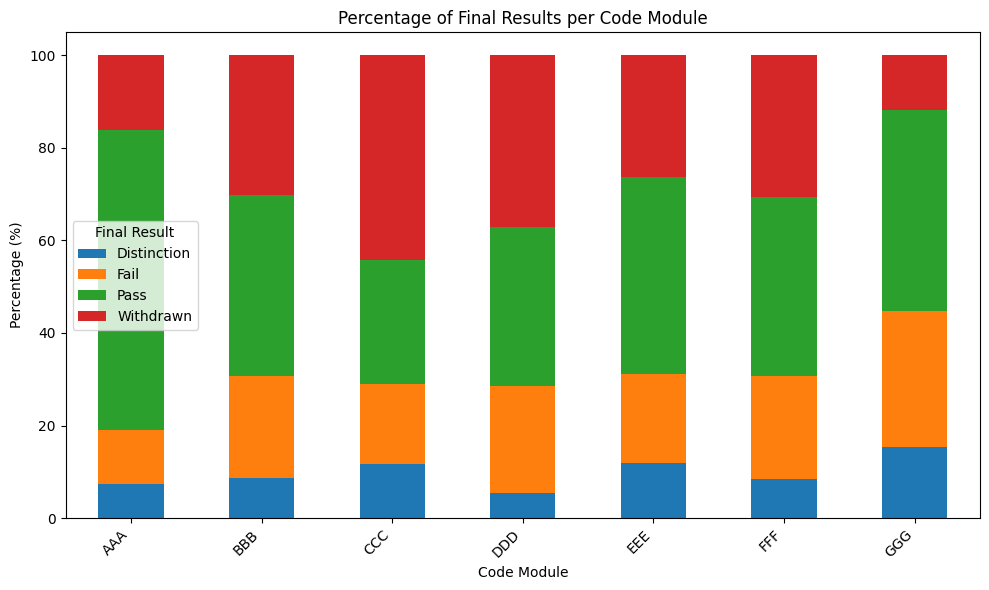

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to fetch and visualize percentages per code_module
def visualize_final_results_per_module():
    # Step 1: Fetch the counts of final results per code_module
    cur.execute('''
        SELECT code_module, final_result, COUNT(*) AS count
        FROM studentInfo
        GROUP BY code_module, final_result
    ''')
    rows = cur.fetchall()

    # Step 2: Process the data to calculate the percentages per code_module
    data = pd.DataFrame(rows, columns=['code_module', 'final_result', 'count'])

    # Step 3: Pivot the table to have final_result as columns and count as values
    result_counts = data.pivot(index='code_module', columns='final_result', values='count').fillna(0)

    # Step 4: Calculate the percentage of each final result per code_module
    result_percentages = result_counts.div(result_counts.sum(axis=1), axis=0) * 100

    # Step 5: Plot the bar chart
    result_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Step 6: Customize the chart
    plt.title('Percentage of Final Results per Code Module')
    plt.xlabel('Code Module')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Final Result')

    # Step 7: Display the chart
    plt.tight_layout()
    plt.show()

# Call the function to visualize the data
visualize_final_results_per_module()

# **Basic Function: DELETE**
###Removing a student's record.

In [ ]:
# Insert some test data to try the CRUD functions
import ipywidgets as widgets
from IPython.display import display

# Function to get available options from courses table
def get_course_options():
    cur.execute("SELECT DISTINCT code_module, code_presentation FROM courses")
    results = cur.fetchall()

    # Convert list of tuples into individual lists for dropdowns
    modules = sorted(set([row[0] for row in results]))  # Unique code_module
    presentations = sorted(set([row[1] for row in results]))  # Unique code_presentation
    return modules, presentations

# Get the module and presentation options from the database
module_options, presentation_options = get_course_options()

# Define a custom layout for the input fields
layout = widgets.Layout(width='400px')  # Adjust the widget width

# Define custom style to expand the label width
style = {'description_width': '150px'}  # Adjust the label width

# Input widgets for other student parameters with adjusted label visibility
id_student_input = widgets.IntText(description="Student ID:", layout=layout, style=style)


# Function to delete student into the database
def delete_student(button):
    # Get values from widgets
    id_student = id_student_input.value


    # Delete the student into the studentInfo table
    try:
        cur.execute('''
            DELETE FROM studentInfo WHERE id_student = ?
        ''', (id_student,))
        conn.commit()
        print(f"Student {id_student} deleted successfully.")
    except sqlite3.IntegrityError as e:
        print(f"Error deleting student {id_student}: {e}")

# Button to submit the form
submit_button = widgets.Button(description="Delete Student")
submit_button.on_click(delete_student)

# Display widgets with fully visible labels
display(id_student_input, submit_button)




IntText(value=0, description='Student ID:', layout=Layout(width='400px'), style=DescriptionStyle(description_w…

Button(description='Delete Student', style=ButtonStyle())

In [ ]:
for row in cur.execute("SELECT * FROM studentInfo WHERE id_student=2201243"):
    print(row)

('AAA', '2013B', 2201243, 'M', '0-10%', 'A Level or Equivalent', '0-35', 1, 30, 'East Anglian Region', 'Y', 'Distinction')


# **Advanced Functions: Overview Data per Module**
### Provides a summary of each module.

In [ ]:
import pandas as pd
# Execute the modified query to group by module code and count final results
query = '''
SELECT
    studentInfo.code_module,
    SUM(studentVle.sum_click) AS total_clicks,
    AVG(studentAssessment.score) AS avg_score,
    COUNT(CASE WHEN studentInfo.final_result = 'Pass' THEN 1 END) AS total_pass,
    COUNT(CASE WHEN studentInfo.final_result = 'Distinction' THEN 1 END) AS total_distinction,
    COUNT(CASE WHEN studentInfo.final_result = 'Fail' THEN 1 END) AS total_fail,
    COUNT(CASE WHEN studentInfo.final_result = 'Withdrawn' THEN 1 END) AS total_withdrawn
FROM studentInfo
JOIN studentVle ON studentInfo.id_student = studentVle.id_student
JOIN studentAssessment ON studentInfo.id_student = studentAssessment.id_student
GROUP BY studentInfo.code_module;
'''

# Fetch the data from the SQL query
df = pd.read_sql_query(query, conn)

# Display the results
print("Module-wise Summary with Total Final Results:")
print(df[['code_module', 'avg_score', 'total_clicks', 'total_pass', 'total_distinction', 'total_fail', 'total_withdrawn']])

Module-wise Summary with Total Final Results:
  code_module  avg_score  total_clicks  total_pass  total_distinction  \
0         AAA  69.474151          2611         468                 44   
1         BBB  67.785102         16393        3013                668   
2         CCC  72.605507          8720        1133                494   
3         DDD  70.823486         10594        1769                273   
4         EEE  84.887830          4428         753                210   
5         FFF  78.989689         14349        2618                578   
6         GGG  67.525930          5192        1075                379   

   total_fail  total_withdrawn  
0          76               90  
1        1376              899  
2         665             1383  
3        1002             1041  
4         241              161  
5        1289             1054  
6         482              111  


# **Advanced Function: Identifying Students At Risk**
### Students at risk of dropping out has a result of fail and a very low score (<30), students at risk of failing has a result of pass but a low pass (<50) and students who are not at risk has a good score and result.

In [ ]:
import pandas as pd

def identify_students_risk_status():
    query = '''
    SELECT studentInfo.id_student, studentInfo.final_result, MAX(studentVle.date) AS last_interaction,
           AVG(studentAssessment.score) AS avg_score, SUM(studentVle.sum_click) AS total_clicks,
           CASE
               WHEN studentInfo.final_result = 'Fail' AND AVG(studentAssessment.score) < 30 THEN 'At Risk of Dropping Out'
               WHEN studentInfo.final_result = 'Pass' AND AVG(studentAssessment.score) < 50 THEN 'At Risk of Failing'
               WHEN studentInfo.final_result = 'Pass' AND AVG(studentAssessment.score) >= 50 THEN 'Not at Risk'
               ELSE 'Needs Further Review'
           END AS risk_status
    FROM studentInfo
    JOIN studentVle ON studentInfo.id_student = studentVle.id_student
    JOIN studentAssessment ON studentInfo.id_student = studentAssessment.id_student
    GROUP BY studentInfo.id_student, studentInfo.final_result;
    '''
    df = pd.read_sql_query(query, conn)

    # Combine at-risk and not-at-risk students
    students_filtered = df[df['risk_status'].isin(['At Risk of Failing', 'At Risk of Dropping Out', 'Not at Risk'])]

    # Display grouped results
    print("At-Risk and Not-At-Risk Students:")
    print(students_filtered[['id_student', 'final_result', 'last_interaction', 'avg_score', 'total_clicks', 'risk_status']])

    return students_filtered

# Example usage
identify_students_risk_status()


At-Risk and Not-At-Risk Students:
       id_student final_result  last_interaction  avg_score  total_clicks  \
0            6516         Pass               -23       60.0             1   
2           11391         Pass                -5       78.0            16   
4           23698         Pass               -18       94.0             4   
6           24186         Pass                -4       60.0             1   
9           24734         Pass               -18       41.0             3   
...           ...          ...               ...        ...           ...   
23335     2697181         Pass               -18       99.0             1   
23336     2697630         Pass               -18       90.0             4   
23337     2697885         Pass               -18       82.0             1   
23339     2698125         Pass               -17       80.0             1   
23341     2698257         Pass                -9       58.0             4   

              risk_status  
0            

,id_student,final_result,last_interaction,avg_score,total_clicks,risk_status
0,6516,Pass,-23,60.0,1,Not at Risk
2,11391,Pass,-5,78.0,16,Not at Risk
4,23698,Pass,-18,94.0,4,Not at Risk
6,24186,Pass,-4,60.0,1,Not at Risk
9,24734,Pass,-18,41.0,3,At Risk of Failing
...,...,...,...,...,...,...
23335,2697181,Pass,-18,99.0,1,Not at Risk
23336,2697630,Pass,-18,90.0,4,Not at Risk
23337,2697885,Pass,-18,82.0,1,Not at Risk
23339,2698125,Pass,-17,80.0,1,Not at Risk


#**Advanced Function: Challenging Materials**
### Identifying module's materials with the lowest Average scores.


In [ ]:
import pandas as pd

def identify_difficult_materials():
    query = '''
    WITH ranked_materials AS (
        SELECT vle.id_site, vle.code_module, AVG(studentAssessment.score) AS avg_score,
               ROW_NUMBER() OVER (PARTITION BY vle.code_module ORDER BY AVG(studentAssessment.score)) AS rank
        FROM vle
        JOIN studentVle ON vle.id_site = studentVle.id_site
        JOIN studentAssessment ON studentVle.id_student = studentAssessment.id_student
        GROUP BY vle.id_site, vle.code_module
    )
    SELECT id_site, code_module, avg_score
    FROM ranked_materials
    WHERE rank <= 10
    ORDER BY code_module, avg_score;
    '''

    df = pd.read_sql_query(query, conn)
    print("Top 10 Most Difficult Materials per Code Module:")
    print(df[['id_site', 'code_module', 'avg_score']])

# Example usage
identify_difficult_materials()


Top 10 Most Difficult Materials per Code Module:
    id_site code_module  avg_score
0    547050         AAA      39.00
1    877236         AAA      52.25
2    546671         AAA      57.40
3    546660         AAA      59.00
4    877051         AAA      60.00
..      ...         ...        ...
65   897067         GGG      52.00
66   896941         GGG      54.50
67   897052         GGG      54.75
68   661598         GGG      55.00
69   798742         GGG      55.00

[70 rows x 3 columns]


# **GUI Installations**
### Packages required for GUI.


In [ ]:
!pip install flask

In [ ]:
!pip install pyngrok

In [ ]:
!pip install --upgrade pyngrok


In [ ]:
from pyngrok import ngrok
# Replace 'YOUR_AUTHTOKEN' with the token you copied from ngrok dashboard
!ngrok authtoken 2nHrrvYITWiX4yQw4WC3SMuLhzr_2ZPhF6u1fdUKCxYxr7qvb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


# **Collated Functions: CRUD and ADVANCED**
###Collating functions into one place to allow easy access for the GUI.

In [ ]:
%%writefile /content/functions8.py
import sqlite3
import pandas as pd

# Database setup function
def setup_database():
    conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE')
    cur = conn.cursor()
    conn.commit()


# Function to insert a student (CREATE)
def insert_student_to_db(student_data):
    try:
        conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE')
        cur = conn.cursor()

        cur.execute('''
            INSERT INTO studentInfo (code_module, code_presentation, id_student, gender, imd_band, highest_education, age_band, num_of_prev_attempts, studied_credits, region, disability, final_result)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', student_data)

        conn.commit()
        conn.close()
        return "Student inserted successfully!"
    except sqlite3.IntegrityError as e:
        return f"Error inserting student: {e}"

# Function to read student data (READ)
def read_student_from_db(id_student):
    conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE', check_same_thread=False)
    cur = conn.cursor()
    cur.execute("SELECT * FROM studentInfo WHERE id_student = ?", (id_student,))
    student_data = cur.fetchone()
    conn.close()
    return student_data

# Function to update student data (UPDATE)
def update_student_in_db(id_student, updated_data):
    try:
        conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE')
        cur = conn.cursor()

        cur.execute('''
            UPDATE studentInfo
            SET code_module = ?, code_presentation = ?, gender = ?, imd_band = ?, highest_education = ?, age_band = ?,
                num_of_prev_attempts = ?, studied_credits = ?, region = ?, disability = ?, final_result = ?
            WHERE id_student = ?
        ''', (*updated_data, id_student))

        conn.commit()
        conn.close()
        return f"Student {id_student} updated successfully!"
    except sqlite3.IntegrityError as e:
        return f"Error updating student {id_student}: {e}"

# Function to delete student data (DELETE)
def delete_student_from_db(id_student):
    try:
        conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE')
        cur = conn.cursor()

        cur.execute('''
            DELETE FROM studentInfo WHERE id_student = ?
        ''', (id_student,))

        conn.commit()
        conn.close()
        return f"Student {id_student} deleted successfully!"
    except sqlite3.IntegrityError as e:
        return f"Error deleting student {id_student}: {e}"

# Function to summarize module performance (ADVANCED)
def summarize_modules():
    query = '''
    SELECT studentInfo.id_student, studentInfo.code_module,
           SUM(studentVle.sum_click) AS total_clicks,
           AVG(studentAssessment.score) AS avg_score,
           COUNT(CASE WHEN studentInfo.final_result = 'Pass' THEN 1 END) AS total_pass,
           COUNT(CASE WHEN studentInfo.final_result = 'Distinction' THEN 1 END) AS total_distinction,
           COUNT(CASE WHEN studentInfo.final_result = 'Fail' THEN 1 END) AS total_fail,
           COUNT(CASE WHEN studentInfo.final_result = 'Withdrawn' THEN 1 END) AS total_withdrawn
    FROM studentInfo
    JOIN studentVle ON studentInfo.id_student = studentVle.id_student
    JOIN studentAssessment ON studentInfo.id_student = studentAssessment.id_student
    GROUP BY studentInfo.code_module;
    '''
    conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE')
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df[['code_module', 'avg_score', 'total_clicks', 'total_pass', 'total_distinction', 'total_fail', 'total_withdrawn']]

# Function to identify students at risk (ADVANCED)
def identify_at_risk_students():
    query = '''
    SELECT studentInfo.id_student, studentInfo.final_result, MAX(studentVle.date) AS last_interaction,
           AVG(studentAssessment.score) AS avg_score, SUM(studentVle.sum_click) AS total_clicks,
           CASE
               WHEN studentInfo.final_result = 'Fail' AND AVG(studentAssessment.score) < 30 THEN 'At Risk of Dropping Out'
               WHEN studentInfo.final_result = 'Pass' AND AVG(studentAssessment.score) < 50 THEN 'At Risk of Failing'
               WHEN studentInfo.final_result = 'Pass' AND AVG(studentAssessment.score) >= 50 THEN 'Not at Risk'
               ELSE 'Needs Further Review'
           END AS risk_status
    FROM studentInfo
    JOIN studentVle ON studentInfo.id_student = studentVle.id_student
    JOIN studentAssessment ON studentInfo.id_student = studentAssessment.id_student
    GROUP BY studentInfo.id_student, studentInfo.final_result;
    '''
    conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE')
    df = pd.read_sql_query(query, conn)
    conn.close()
    at_risk_students = df[df['risk_status'].isin(['At Risk of Failing', 'At Risk of Dropping Out', 'Not at Risk'])]
    return at_risk_students[['id_student', 'final_result', 'last_interaction', 'avg_score', 'total_clicks', 'risk_status']]


# Function to identify difficult materials (ADVANCED)
def identify_difficult_materials():
    query = '''
    WITH ranked_materials AS (
        SELECT vle.id_site, vle.code_module, AVG(studentAssessment.score) AS avg_score,
               ROW_NUMBER() OVER (PARTITION BY vle.code_module ORDER BY AVG(studentAssessment.score)) AS rank
        FROM vle
        JOIN studentVle ON vle.id_site = studentVle.id_site
        JOIN studentAssessment ON studentVle.id_student = studentAssessment.id_student
        GROUP BY vle.id_site, vle.code_module
    )
    SELECT id_site, code_module, avg_score
    FROM ranked_materials
    WHERE rank <= 10
    ORDER BY code_module, avg_score;
    '''

    conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE')
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df[['id_site', 'code_module', 'avg_score']]

Overwriting /content/functions8.py


# **GUI Using Flask**
###GUI through a website format.

In [ ]:
from flask import Flask, request, render_template_string, redirect, url_for
import sqlite3
import pandas as pd
from functions8 import (
    setup_database, insert_student_to_db, read_student_from_db,
    update_student_in_db, delete_student_from_db, summarize_modules,
    identify_at_risk_students, identify_difficult_materials
)

app = Flask(__name__)

# Initialize the database (run once)
setup_database()

# Fetch dropdown options from the database
def get_course_options():
    conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE', check_same_thread=False)
    cur = conn.cursor()
    cur.execute("SELECT DISTINCT code_module, code_presentation FROM studentInfo")
    results = cur.fetchall()
    modules = sorted(set([row[0] for row in results if row[0] is not None]))
    presentations = sorted(set([row[1] for row in results if row[1] is not None]))
    return modules, presentations

def get_unique_options(field_name):
    conn = sqlite3.connect('/content/drive/My Drive/Database/StudentVLE', check_same_thread=False)
    cur = conn.cursor()
    cur.execute(f"SELECT DISTINCT {field_name} FROM studentInfo")
    results = cur.fetchall()
    return sorted([row[0] for row in results if row[0] is not None])

# Fetch options for dropdowns
module_options, presentation_options = get_course_options()
highest_education_options = get_unique_options('highest_education')
imd_band_options = get_unique_options('imd_band')
region_options = get_unique_options('region')
studied_credits_options = get_unique_options('studied_credits')

# HTML templates
home_page = '''
<!DOCTYPE html>
<html>
<head>
    <title>Student VLE CRUD Operations</title>
</head>
<body>
    <h1>Student VLE CRUD Operations</h1>
    <ul>
        <li><a href="/insert">Insert Student</a></li>
        <li><a href="/read">Read Student</a></li>
        <li><a href="/update">Update Student</a></li>
        <li><a href="/delete">Delete Student</a></li>
        <li><a href="/insights">Insights</a></li>
    </ul>
</body>
</html>
'''

insights_page = '''
<!DOCTYPE html>
<html>
<head>
    <title>Insights</title>
</head>
<body>
    <h1>Insights</h1>
    <ul>
        <li><a href="/module_summary">Module Summary</a></li>
        <li><a href="/at_risk_students">Identify At-Risk Students</a></li>
        <li><a href="/difficult_materials">Identify Difficult Materials</a></li>
    </ul>
    <br>
    <a href="/">Back to Home</a>
</body>
</html>
'''

insert_page = '''
<!DOCTYPE html>
<html>
<head>
    <title>Insert Student</title>
</head>
<body>
    <h1>Insert Student Information</h1>
    <form method="POST">
        <label>Module:</label>
        <select name="code_module">
            {% for option in module_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Presentation:</label>
        <select name="code_presentation">
            {% for option in presentation_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Student ID:</label><input type="text" name="id_student"><br><br>
        <label>Gender:</label>
        <select name="gender">
            <option value="M">M</option>
            <option value="F">F</option>
            <option value="Other">Other</option>
        </select><br><br>
        <label>IMD Band:</label>
        <select name="imd_band">
            {% for option in imd_band_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Highest Education:</label>
        <select name="highest_education">
            {% for option in highest_education_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Age Band:</label>
        <select name="age_band">
            <option value="0-35">0-35</option>
            <option value="35-55">35-55</option>
            <option value="55<=">55<=</option>
        </select><br><br>
        <label>Previous Attempts:</label><input type="text" name="num_of_prev_attempts"><br><br>
        <label>Studied Credits:</label>
        <select name="studied_credits">
            {% for option in studied_credits_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Region:</label>
        <select name="region">
            {% for option in region_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Disability:</label>
        <select name="disability">
            <option value="Y">Yes</option>
            <option value="N">No</option>
        </select><br><br>
        <label>Final Result:</label>
        <select name="final_result">
            <option value="Distinction">Distinction</option>
            <option value="Pass">Pass</option>
            <option value="Fail">Fail</option>
            <option value="Withdrawn">Withdrawn</option>
        </select><br><br>
        <input type="submit" value="Insert Student">
    </form>
    <br><br>
    <a href="/">Back to Home</a>
</body>
</html>
'''

update_page = '''
<!DOCTYPE html>
<html>
<head>
    <title>Update Student</title>
</head>
<body>
    <h1>Update Student Information</h1>
    <form method="POST">
        <label>Student ID:</label><input type="text" name="id_student"><br><br>
        <label>Module:</label>
        <select name="code_module">
            {% for option in module_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Presentation:</label>
        <select name="code_presentation">
            {% for option in presentation_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Gender:</label>
        <select name="gender">
            <option value="M">M</option>
            <option value="F">F</option>
            <option value="Other">Other</option>
        </select><br><br>
        <label>IMD Band:</label>
        <select name="imd_band">
            {% for option in imd_band_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Highest Education:</label>
        <select name="highest_education">
            {% for option in highest_education_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Age Band:</label>
        <select name="age_band">
            <option value="0-35">0-35</option>
            <option value="35-55">35-55</option>
            <option value="55<=">55<=</option>
        </select><br><br>
        <label>Previous Attempts:</label><input type="text" name="num_of_prev_attempts"><br><br>
        <label>Studied Credits:</label>
        <select name="studied_credits">
            {% for option in studied_credits_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Region:</label>
        <select name="region">
            {% for option in region_options %}
            <option value="{{ option }}">{{ option }}</option>
            {% endfor %}
        </select><br><br>
        <label>Disability:</label>
        <select name="disability">
            <option value="Y">Yes</option>
            <option value="N">No</option>
        </select><br><br>
        <label>Final Result:</label>
        <select name="final_result">
            <option value="Distinction">Distinction</option>
            <option value="Pass">Pass</option>
            <option value="Fail">Fail</option>
            <option value="Withdrawn">Withdrawn</option>
        </select><br><br>
        <input type="submit" value="Update Student">
    </form>
    <br><br>
    <a href="/">Back to Home</a>
</body>
</html>
'''

result_page = '''
<!DOCTYPE html>
<html>
<head>
    <title>Result</title>
    <style>
        table, th, td {
            border: 1px solid black;
            border-collapse: collapse;
        }
        th, td {
            padding: 8px;
        }
    </style>
</head>
<body>
    <h1>Result</h1>
    <p>{{ result | safe }}</p>
    <br><br>
    <a href="/">Back to Home</a>
</body>
</html>
'''

# Routes for CRUD operations
@app.route('/')
def home():
    return render_template_string(home_page)

@app.route('/insights')
def insights():
    return render_template_string(insights_page)

@app.route('/insert', methods=['GET', 'POST'])
def insert_student():
    if request.method == 'POST':
        student_data = (
            request.form['code_module'],
            request.form['code_presentation'],
            request.form['id_student'],
            request.form['gender'],
            request.form['imd_band'],
            request.form['highest_education'],
            request.form['age_band'],
            request.form['num_of_prev_attempts'],
            request.form['studied_credits'],
            request.form['region'],
            request.form['disability'],
            request.form['final_result']
        )
        result = insert_student_to_db(student_data)
        return render_template_string(result_page, result=result)
    return render_template_string(insert_page,
                                  module_options=module_options,
                                  presentation_options=presentation_options,
                                  highest_education_options=highest_education_options,
                                  imd_band_options=imd_band_options,
                                  region_options=region_options,
                                  studied_credits_options=studied_credits_options)

@app.route('/read', methods=['GET', 'POST'])
def read_student():
    if request.method == 'POST':
        id_student = request.form['id_student']

        # Read student data from the database
        student_data = read_student_from_db(id_student)

        if student_data:
            # Assuming student_data is a tuple, unpack it correctly
            module, presentation, id_student, gender, imd_band, highest_education, age_band, num_of_prev_attempts, studied_credits, region, disability, final_result = student_data

            # Format student data for display with line breaks
            result = f'Student Data:<br>Module: {module}<br>Presentation: {presentation}<br>Student ID: {id_student}<br>Gender: {gender}<br>IMD Band: {imd_band}<br>Highest Education: {highest_education}<br>Age Band: {age_band}<br>Previous Attempts: {num_of_prev_attempts}<br>Studied Credits: {studied_credits}<br>Region: {region}<br>Disability: {disability}<br>Final Result: {final_result}'
        else:
            # If student is not found, show a "not found" message
            result = f"Student with ID {id_student} not found."

        return render_template_string(result_page, result=result)

    return '''
    <form method="POST">
        <label>Student ID:</label><input type="text" name="id_student"><br><br>
        <input type="submit" value="Read Student">
    </form>
    <br><br>
    <a href="/">Back to Home</a>
    '''

@app.route('/update', methods=['GET', 'POST'])
def update_student():
    if request.method == 'POST':
        id_student = request.form['id_student']
        updated_data = (
            request.form['code_module'],
            request.form['code_presentation'],
            request.form['gender'],
            request.form['imd_band'],
            request.form['highest_education'],
            request.form['age_band'],
            request.form['num_of_prev_attempts'],
            request.form['studied_credits'],
            request.form['region'],
            request.form['disability'],
            request.form['final_result']
        )
        result = update_student_in_db(id_student, updated_data)
        return render_template_string(result_page, result=result)
    return render_template_string(update_page,
                                  module_options=module_options,
                                  presentation_options=presentation_options,
                                  highest_education_options=highest_education_options,
                                  imd_band_options=imd_band_options,
                                  region_options=region_options,
                                  studied_credits_options=studied_credits_options)

@app.route('/delete', methods=['GET', 'POST'])
def delete_student():
    if request.method == 'POST':
        id_student = request.form['id_student']
        result = delete_student_from_db(id_student)
        return render_template_string(result_page, result=result)
    return '''
    <form method="POST">
        <label>Student ID:</label><input type="text" name="id_student"><br><br>
        <input type="submit" value="Delete Student">
    </form>
    <br><br>
    <a href="/">Back to Home</a>
    '''

# Routes for Advanced Functions
@app.route('/module_summary')
def module_summary():
    df = summarize_modules()
    result = df.to_html(index=False)
    return render_template_string(result_page, result=result)

@app.route('/at_risk_students')
def at_risk_students():
    df = identify_at_risk_students()
    result = df.to_html(index=False)
    return render_template_string(result_page, result=result)

@app.route('/difficult_materials')
def difficult_materials():
    df = identify_difficult_materials()
    result = df.to_html(index=False)
    return render_template_string(result_page, result=result)


# Run Flask app
if __name__ == "__main__":
    from pyngrok import ngrok
    public_url = ngrok.connect(5000)
    print(f" * ngrok tunnel: {public_url}")
    app.run(port=5000)


 * ngrok tunnel: NgrokTunnel: "https://5d8a-34-74-144-117.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Oct/2024 18:38:01] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2024 18:38:02] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2024 18:38:03] "GET /insights HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2024 18:38:06] "GET /at_risk_students HTTP/1.1" 200 -
